In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('Report.mplstyle')

In [2]:
the = pd.read_excel('Data/parameters_He_Ne (reformatted).xlsx', sheet_name=None)
exp = pd.read_excel('Data/exp_gauss3.xlsx', sheet_name=None)

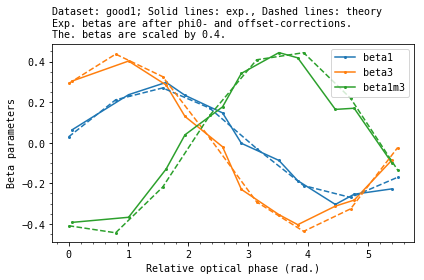

In [3]:
dataset = 'good1'
phi0 = 5.282
f = 0.4
keys = ['beta1', 'beta3', 'beta1m3']

plt.figure()
plt.xlabel('Relative optical phase (rad.)')
plt.ylabel('Beta parameters')
plt.title(f"""Dataset: {dataset}; Solid lines: exp., Dashed lines: theory
Exp. betas are after phi0- and offset-corrections.
The. betas are scaled by {f}.""",
          fontsize='medium',
          loc='left')
df = exp[dataset]
df['phase_adj'] = (df['phase']*2*np.pi - phi0) % (2*np.pi)
df = df.set_index('phase_adj').sort_index()
fitted = exp['fitted'].set_index('dataset').loc[dataset]
th = df.index
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, df[f'ne_{k}']-fitted[f'ne_{k}_offset_value'], '.-', label=f'{k}', **prop)

df = the['Ne.1.0.8 w2w'].set_index(['dataset', 'phi (deg)']).loc[dataset]
th = df.index/180*np.pi
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, f*df[k], '.--', label='', **prop)

plt.legend()
plt.tight_layout()
plt.show()

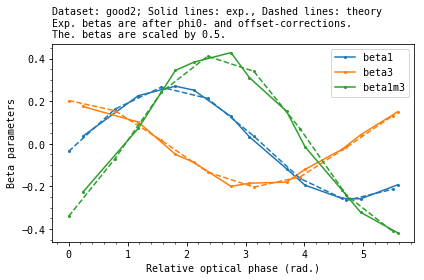

In [4]:
dataset = 'good2'
phi0 = 5.101
f = 0.5
keys = ['beta1', 'beta3', 'beta1m3']

plt.figure()
plt.xlabel('Relative optical phase (rad.)')
plt.ylabel('Beta parameters')
plt.title(f"""Dataset: {dataset}; Solid lines: exp., Dashed lines: theory
Exp. betas are after phi0- and offset-corrections.
The. betas are scaled by {f}.""",
          fontsize='medium',
          loc='left')
df = exp[dataset]
df['phase_adj'] = (df['phase']*2*np.pi - phi0) % (2*np.pi)
df = df.set_index('phase_adj').sort_index()
fitted = exp['fitted'].set_index('dataset').loc[dataset]
th = df.index
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, df[f'ne_{k}']-fitted[f'ne_{k}_offset_value'], '.-', label=f'{k}', **prop)

df = the['Ne.1.0.8 w2w'].set_index(['dataset', 'phi (deg)']).loc[dataset]
th = df.index/180*np.pi
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, f*df[k], '.--', label='', **prop)

plt.legend()
plt.tight_layout()
plt.show()

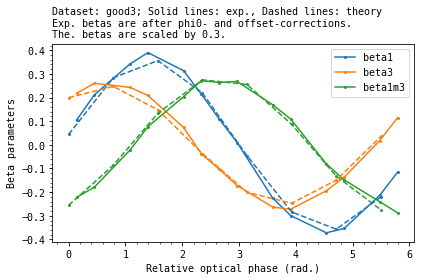

In [5]:
dataset = 'good3'
phi0 = 4.259
f = 0.3
keys = ['beta1', 'beta3', 'beta1m3']

plt.figure()
plt.xlabel('Relative optical phase (rad.)')
plt.ylabel('Beta parameters')
plt.title(f"""Dataset: {dataset}; Solid lines: exp., Dashed lines: theory
Exp. betas are after phi0- and offset-corrections.
The. betas are scaled by {f}.""",
          fontsize='medium',
          loc='left')
df = exp[dataset]
df['phase_adj'] = (df['phase']*2*np.pi - phi0) % (2*np.pi)
df = df.set_index('phase_adj').sort_index()
fitted = exp['fitted'].set_index('dataset').loc[dataset]
th = df.index
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, df[f'ne_{k}']-fitted[f'ne_{k}_offset_value'], '.-', label=f'{k}', **prop)

df = the['Ne.1.0.8 w2w'].set_index(['dataset', 'phi (deg)']).loc[dataset]
th = df.index/180*np.pi
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, f*df[k], '.--', label='', **prop)

plt.legend()
plt.tight_layout()
plt.show()

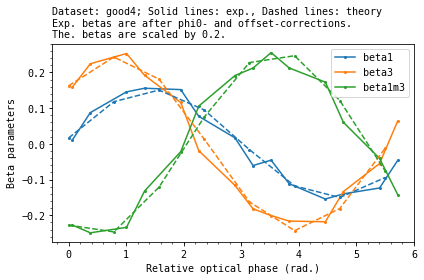

In [6]:
dataset = 'good4'
phi0 = 3.393
f = 0.2
keys = ['beta1', 'beta3', 'beta1m3']

plt.figure()
plt.xlabel('Relative optical phase (rad.)')
plt.ylabel('Beta parameters')
plt.title(f"""Dataset: {dataset}; Solid lines: exp., Dashed lines: theory
Exp. betas are after phi0- and offset-corrections.
The. betas are scaled by {f}.""",
          fontsize='medium',
          loc='left')
df = exp[dataset]
df['phase_adj'] = (df['phase']*2*np.pi - phi0) % (2*np.pi)
df = df.set_index('phase_adj').sort_index()
fitted = exp['fitted'].set_index('dataset').loc[dataset]
th = df.index
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, df[f'ne_{k}']-fitted[f'ne_{k}_offset_value'], '.-', label=f'{k}', **prop)

df = the['Ne.1.0.8 w2w'].set_index(['dataset', 'phi (deg)']).loc[dataset]
th = df.index/180*np.pi
for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
    plt.plot(th, f*df[k], '.--', label='', **prop)

plt.legend()
plt.tight_layout()
plt.show()